## 데이터 시각화

In [6]:
import zipfile

In [7]:
DATA_IN_PATH ='./data_in/'

file_list = ['labeledTrainData.tsv.zip','unlabeledTrainData.tsv.zip','testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH+ file,'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#주피터에서 바로 그려지도록함

train_data = pd.read_csv(DATA_IN_PATH +"labeledTrainData.tsv", header=0, delimiter="\t", quoting=3) # tsv : Tab Separated Values 이므로 탭으로 구분
#quoting = 3  쌍따옴표 무시

train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [9]:
print('전체 학습 데이터 개수: {}'.format(len(train_data)))

전체 학습 데이터 개수: 25000


In [10]:
train_lenght = train_data['review'].apply(len) # 판다스 데이터 프레임 행별로 len함수를 적용한 결과를 나타냄
train_lenght.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

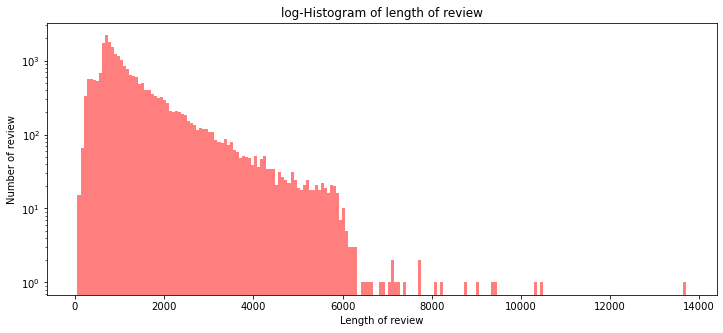

In [11]:
# 데이터 시각화
plt.figure(figsize=(12,5))
plt.hist(train_lenght, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log',nonposy='clip')

plt.title("log-Histogram of length of review")
plt.xlabel("Length of review")
plt.ylabel("Number of review")


{'whiskers': [<matplotlib.lines.Line2D at 0x24ad35889a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ad3588070>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ad2b0c4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x24ad3595850>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ad3595190>],
 'means': [<matplotlib.lines.Line2D at 0x24ad3595be0>]}

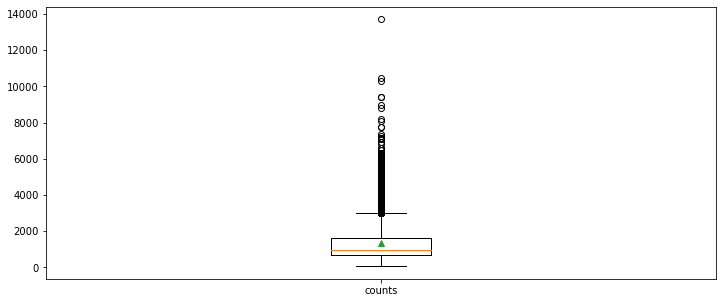

In [12]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_lenght,
    labels=['counts'],
    showmeans=True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

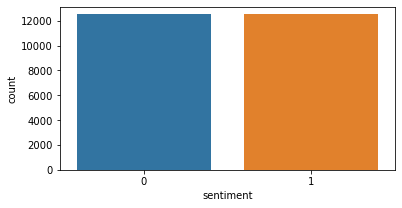

In [13]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

#데이터 균등하게 되어있다

Text(0, 0.5, 'Number of reviews')

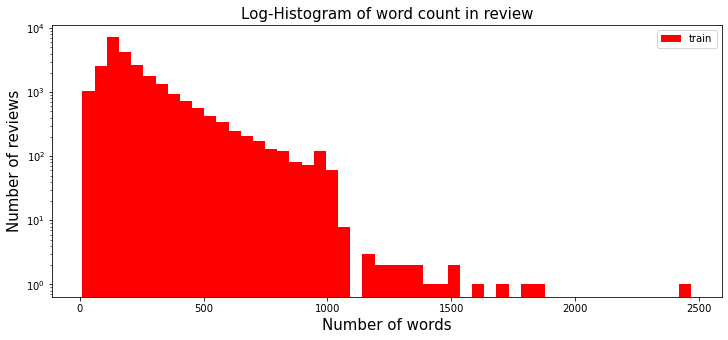

In [14]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' '))) #영어는 띄어쓰기 기준으로 단어가 구분되므로, 이 사실을 이용해 단어수 계산

plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log',nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

## 데이터 전처리

In [23]:
import re
import pandas
import numpy
import json
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


In [16]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv',header=0, delimiter='\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [17]:
#BeautifulSoup이용해 HTML 태그 제거
review = train_data['review'][0]
review_text = BeautifulSoup(review,"html5lib").get_text()
review_text = re.sub("[^a-zA-Z]"," ",review_text) #정규표현식 적용부분을 공백으로 바꿔서 업뎃하는 부분 

print(review_text)


 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [27]:
# nltk.downloda()로 nltk data 다운로드해야함
stop_words = set(stopwords.words('english'))

review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]

In [28]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [29]:
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [30]:
#위와 같은 작업을 매크로화
def preprocessing(review, remove_stopwords = False): # 불용어 제거 옵션
    
    #HTML 태그 제거
    review_text = BeautifulSoup(review,"html5lib").get_text()
    
    #영어 제외 공백으로 바꿈
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    words = review_text.lower().split()

    if remove_stopwords:
        # 불용어 제거
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

        clean_review = ' '.join(words)
    
    else:
        clean_review = ' '.join(words)
    
    return clean_review
    

In [31]:
# 매크로 이용하여 데이터 전처리

clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))

clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [32]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

In [41]:
#텐서플로우 토크나이저 이용해 전처리한 데이터를 인덱스로 구성된 벡터로 변환

tokenizer = Tokenizer() #텐서플로우 토크나이져 생성
tokenizer.fit_on_texts(clean_train_reviews) # 리뷰의 단어들이 정수로 매핑됨 각 정수는 단어사전(tokenizer.word_index)의 인덱스를 뜻함
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)



In [42]:
word_vocab = tokenizer.word_index 
word_vocab["<PAD>"] = 0
print(word_vocab)

73006, 'obscessed': 73007, 'brittleness': 73008, 'reproachable': 73009, 'desenstizing': 73010, 'resolvement': 73011, 'newpaper': 73012, 'titallition': 73013, 'mumari': 73014, 'proms': 73015, 'gust': 73016, 'celticism': 73017, 'crom': 73018, 'cruic': 73019, 'disowning': 73020, 'haight': 73021, 'asbury': 73022, 'symmetric': 73023, 'functionally': 73024, 'elie': 73025, 'marlen': 73026, 'chiseling': 73027, 'irreverently': 73028, 'leger': 73029, 'bolliwood': 73030, 'naturedly': 73031, 'mcgyver': 73032, 'monicker': 73033, 'daerden': 73034, 'morcheeba': 73035, 'blackmore': 73036, 'ridd': 73037, 'dugal': 73038, 'doones': 73039, 'ensor': 73040, 'faggus': 73041, 'tamahori': 73042, 'monahans': 73043, 'punter': 73044, 'hillybilly': 73045, 'culls': 73046, 'armistice': 73047, 'vendors': 73048, 'winders': 73049, 'hitlerian': 73050, 'putsch': 73051, 'hoffbrauhaus': 73052, 'mstk': 73053, 'accuracies': 73054, 'bakumatsu': 73055, 'nakada': 73056, 'ryonosuke': 73057, 'nananana': 73058, 'pissible': 73059, 

In [43]:
print("전체 단어 개수: ",len(word_vocab))

전체 단어 개수:  74066


In [44]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [47]:
# 패딩 작업 수행

MAX_SEQ_LEN = 174 # 단어 최대길이를 설정, 데이터 분석했을 때 단어 길의의 중간값!

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQ_LEN, padding='post')# 부족하면 그 뒤를  max_sqe_len 까지 0으로 채움

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [49]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor: ', train_labels.shape)

Shape of label tensor:  (25000,)


In [55]:
# Test 데이터에 대한 전처리 수행

test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []

for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords= True))

clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']}) # 테스트 데이터는 라벨링 정보가 없다. id로 매핑
test_id = np.array(test_data['id'])

tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQ_LEN, padding='post') # 부족하면 그 뒤를  max_sqe_len 까지 0으로 채움


## 전처리한 데이터를 모델링에 이용하기 위해 저장
    - 전처리된 텍스트 데이터
    - 벡터화한 데이터 
    - 정답 라벨
    - 데이터 정보(단어 사전, 전체단어 갯수)
    

In [51]:
DATA_IN_PATH ='./data_in/'
DATA_OUT_PATH = './data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_cofigs.json'

import os
# 파일 저장
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_IN_PATH)

In [54]:
#데이터 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

#정제된 텍스트 csv형태
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index= False)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)


In [56]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index= False)
